<a href="https://colab.research.google.com/github/ZhouEEEEEE/JSC_270-Assign3/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import beta, uniform
import matplotlib.pyplot as plt


In [2]:
def betagene(a, b):
  result = np.random.beta(a, b)
  return result


Question 1D)

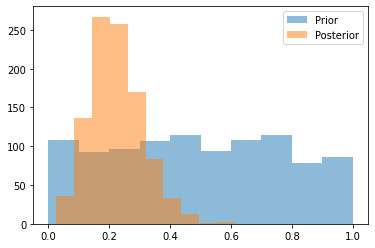

In [3]:
h1 = [betagene(1, 1) for i in range(1000)]
h2 = [betagene(5, 17) for i in range(1000)]

plt.hist(h1, alpha=0.5, label="Prior")
plt.hist(h2, alpha=0.5, label="Posterior")
plt.legend(loc='upper right')
plt.show()

In [4]:
print("Prior mean:" + str(np.mean(h1)))
print("Posterior mean:" + str(np.mean(h2)))

Prior mean:0.48937707310635276
Posterior mean:0.22373771767372846


Question 1E


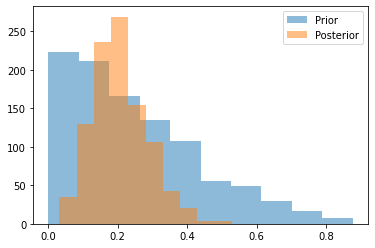

In [5]:
h3 = [betagene(1, 3) for i in range(1000)]
h4 = [betagene(5, 19) for i in range(1000)]

plt.hist(h3, alpha=0.5, label="Prior")
plt.hist(h4, alpha=0.5, label="Posterior")
plt.legend(loc='upper right')
plt.show()

In [6]:
print("Prior mean:" + str(np.mean(h3)))
print("Posterior mean:" + str(np.mean(h4)))

Prior mean:0.2479709939649467
Posterior mean:0.20732808349788076


Question 1F

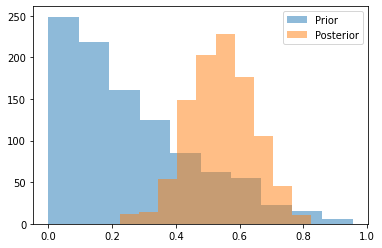

In [7]:
h5 = [betagene(1, 3) for i in range(1000)]
h6 = [betagene(13, 11) for i in range(1000)]

plt.hist(h5, alpha=0.5, label="Prior")
plt.hist(h6, alpha=0.5, label="Posterior")
plt.legend(loc='upper right')
plt.show()

In [8]:
print("Prior mean:" + str(np.mean(h5)))
print("Posterior mean:" + str(np.mean(h6)))

Prior mean:0.25815901194594465
Posterior mean:0.541990816843026


Question 2B

In [9]:
def expogene(a):
  result = np.random.exponential(a)
  return result

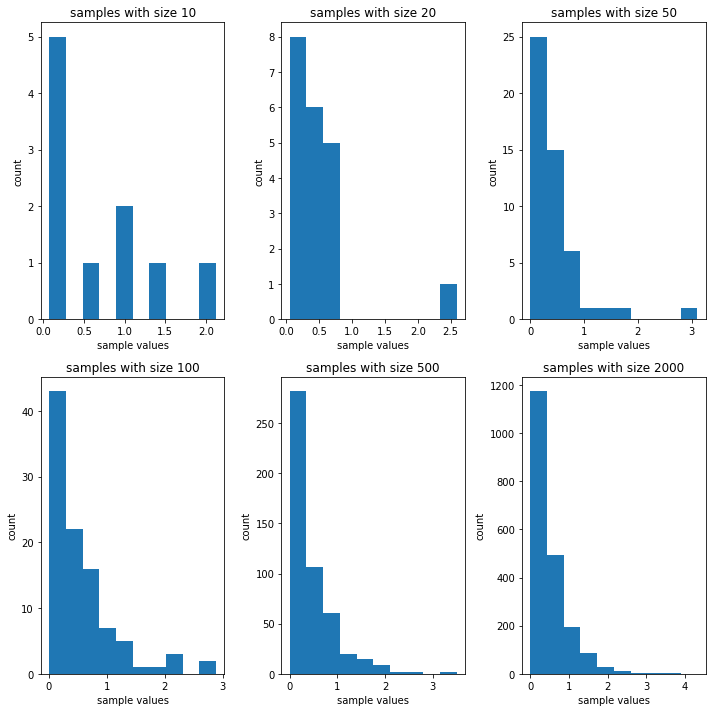

In [10]:
np.random.seed(688)
s10 = [expogene(0.5) for i in range(10)]
s20 = [expogene(0.5) for i in range(20)]
s50 = [expogene(0.5) for i in range(50)]
s100 = [expogene(0.5) for i in range(100)]
s500 = [expogene(0.5) for i in range(500)]
s2000 = [expogene(0.5) for i in range(2000)]
fig, axs = plt.subplots(2, 3,figsize=(10,10))
axs[0, 0].hist(s10)
axs[0, 0].set_title('samples with size 10')
axs[0, 1].hist(s20)
axs[0, 1].set_title('samples with size 20')
axs[0, 2].hist(s50)
axs[0, 2].set_title('samples with size 50')
axs[1, 0].hist(s100)
axs[1, 0].set_title('samples with size 100')
axs[1, 1].hist(s500)
axs[1, 1].set_title('samples with size 500')
axs[1, 2].hist(s2000)
axs[1, 2].set_title('samples with size 2000')

for ax in axs.flat:
    ax.set(xlabel='sample values', ylabel='count')

fig.tight_layout()  


Question 2C

In [11]:
a = [np.mean(s10), np.mean(s20), np.mean(s50), np.mean(s100), np.mean(s500), np.mean(s2000)]
a

[0.6632430802473988,
 0.48669181268284134,
 0.4430111537037562,
 0.543217328545346,
 0.4569308889722538,
 0.4941218171193287]

In [12]:
b = [10, 20, 50, 100, 500, 2000]

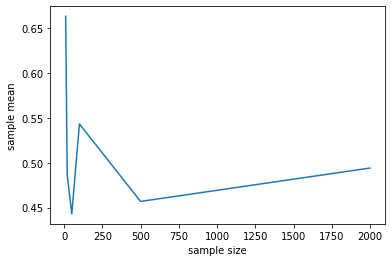

In [13]:
plt.plot(b, a)
plt.ylabel('sample mean')
plt.xlabel('sample size')
plt.show()

Question3

A)

In [14]:

def simulate_data(sample_size):
  # Generate features
  rand_x1 = np.random.uniform(-100, 100, size=sample_size)
  rand_x1 = np.reshape(rand_x1,newshape=(sample_size,1))
  rand_x2 = np.random.uniform(-150, 150, size=sample_size)
  rand_x2 = np.reshape(rand_x2,newshape=(sample_size,1))
  rand_d = np.random.choice([0,1,2,3,4],size = sample_size)
  rand_d = np.reshape(rand_d,newshape=(sample_size,1))
  epsilon = np.random.normal(0, 4,size = sample_size)
  epsilon = np.reshape(epsilon,newshape=(sample_size,1))

  t = 5 + 0.6*rand_x1 + 0.8*rand_x2 + 0.4*rand_d + epsilon

  pi = np.exp(t)/(np.exp(t)+1)
  y = (pi > 0.5).astype(float)


  lead_ones = np.ones((sample_size,1))
  
  X = np.concatenate([lead_ones,rand_x1, rand_x2, rand_d],axis=1) 

  return X,y

# Execute simulation
np.random.seed(10086)
X, y = simulate_data(1000)
data = [X, y]


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

np.random.seed(10086)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X = std_scaler.fit_transform(X)

X_train, X_test, t_train, t_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 10)

logit = LogisticRegression(fit_intercept = True, max_iter=1000, penalty='none')

logit.fit(X_train, t_train)

t_train_preds_lr = logit.predict(X_train)

t_test_preds_lr = logit.predict(X_test)

train_acc = precision_score(t_train, t_train_preds_lr)
test_acc = precision_score(t_test, t_test_preds_lr)
test_acc1 = recall_score(t_test, t_test_preds_lr)

print('Train precision: ',train_acc)
print('Test precision: ',test_acc)
print('Test recall: ',test_acc1)

Train precision:  0.9833729216152018
Test precision:  0.98
Test recall:  0.98989898989899


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


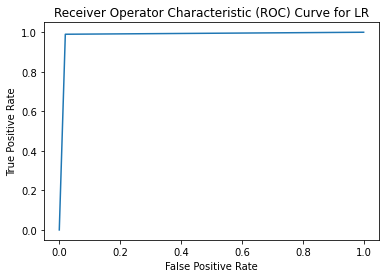

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import *

# Plot the ROC curve for random forest
fpr, tpr, thresholds = roc_curve(t_test, t_test_preds_lr, pos_label = 1)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve for LR')
plt.show()

Question 3C)


(array([2.000e+00, 0.000e+00, 4.000e+00, 9.000e+00, 1.300e+01, 1.800e+01,
        4.800e+01, 1.440e+02, 8.480e+02, 3.914e+03]),
 array([0.79767442, 0.81790698, 0.83813953, 0.85837209, 0.87860465,
        0.89883721, 0.91906977, 0.93930233, 0.95953488, 0.97976744,
        1.        ]),
 <a list of 10 Patch objects>)

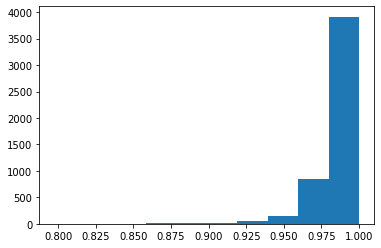

In [17]:
from sklearn.tree import DecisionTreeClassifier
def get_result2(a, data):
  new_array = np.empty(a)
  X1 = data[0]
  y1 = data[1]
  for i in range(0, len(new_array)):
    #generate resamples
    X_list = []
    y_list = []
    for j in range(1000):
      a = np.random.choice(len(X1))
      X_list.append(X1[a])
      y_list.append(y1[a])
    #fit decision tree
    rfclf = DecisionTreeClassifier(max_depth = 6, random_state = 10, max_features='log2')
    rfclf.fit(X_list, y_list)
    y_preds_rf = rfclf.predict(X_list)

    #compute resample evaluation RECALL(TP/TP + FN)
    f1_rf = f1_score(y_list, y_preds_rf)

    #exchange to array
    new_array[i] = f1_rf
    i += 1

  return new_array
np.random.seed(10086)

result2 = get_result2(5000, data)

Question 3D)

(array([2.000e+00, 0.000e+00, 4.000e+00, 9.000e+00, 1.300e+01, 1.800e+01,
        4.800e+01, 1.440e+02, 8.480e+02, 3.914e+03]),
 array([0.79767442, 0.81790698, 0.83813953, 0.85837209, 0.87860465,
        0.89883721, 0.91906977, 0.93930233, 0.95953488, 0.97976744,
        1.        ]),
 <a list of 10 Patch objects>)

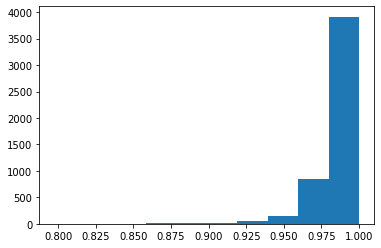

In [18]:
plt.hist(result2)

Question 3E)

In [22]:
mean_dt = result2.mean()
f1_lr = f1_score(t_test, t_test_preds_lr)
print('Mean F1 score of decistion trees', mean_dt)
print('F1 score of logistic regression ', f1_lr)

Mean F1 score of decistion trees 0.9839263451082483
F1 score of logistic regression  0.9849246231155778
